### Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Importing Dataset

In [52]:
iris_data = pd.read_excel('iris (1).xls')

In [53]:
#Data Set
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
#Information About Imported dataset
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [55]:
#Columns
iris_data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### Checking Missing Values

In [56]:
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Column SL, SW, Pl Have Missing Values

### Filling Missing Values By Column Mean

In [57]:
miss_col = ['SL','SW','PL']

for i in miss_col:
    iris_data[i] = iris_data[i].fillna(iris_data[i].mean())

In [58]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Missing Values Were Removed

### Checking For Outliers By Plotting Boxplot

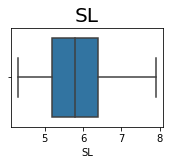

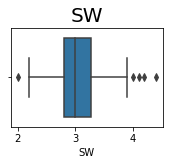

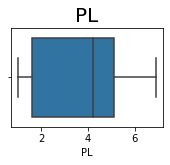

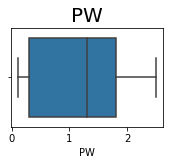

In [59]:
cols = ['SL','SW','PL','PW']


for i in cols:
    plt.subplot(2,2,j)
    plt.title(i,fontsize=20)
    sns.boxplot(iris_data[i])
    plt.show()

Only SW column have outliers

### Remove Outliers

In [60]:
Q1 = np.percentile(iris_data['SW'],25,interpolation='midpoint')
print('Q1 = ',Q1)

Q2 = np.percentile(iris_data['SW'],50,interpolation='midpoint')
print('Q1 = ',Q2)

Q3 = np.percentile(iris_data['SW'],75,interpolation='midpoint')
print('Q3 = ',Q3)

IQR = Q3-Q1
print('IQR = ',IQR)

low_lim = Q1-1.5*IQR
print('Low Limit = ',low_lim)

high_lim = Q3+1.5*IQR
print('High Limit = ',high_lim)

Q1 =  2.8
Q1 =  3.0
Q3 =  3.25
IQR =  0.4500000000000002
Low Limit =  2.1249999999999996
High Limit =  3.9250000000000003


In [61]:
#remove Outliers
iris_data['SW'] = np.where(iris_data['SW']>high_lim,high_lim,np.where(iris_data['SW']<low_lim,low_lim,iris_data['SW']))

<AxesSubplot:xlabel='SW'>

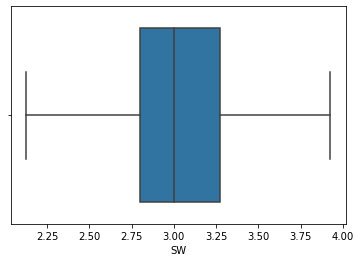

In [62]:
sns.boxplot(iris_data['SW'])

Outliers from SW column were removed

### Label Encoding for Classification Column

In [63]:
encoder = LabelEncoder()
iris_data['Classification'] = encoder.fit_transform(iris_data['Classification'])

In [64]:
iris_data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


### Assign Target & Predictor Variable

In [124]:
#Target Variable
y = iris_data['Classification']
#Predictor variable
x = iris_data.drop('Classification',axis=1)

### Standard Scaling On X

In [159]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

### Split Train & Test set

In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Different Classification Techniques

### Logistic Regression

In [162]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
lr_pred

array([2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 1, 0, 2, 2, 2, 0, 2])

In [163]:
accuracy_score(y_test,lr_pred)

0.8666666666666667

### K Nearest Neighbor Classifier

In [164]:
acc_values = []
neighbors = np.arange(1,10)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski')
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    acc_values.append(accuracy)

In [165]:
acc_values

[0.8,
 0.8666666666666667,
 0.8,
 0.8333333333333334,
 0.8,
 0.8333333333333334,
 0.7666666666666667,
 0.8,
 0.8333333333333334]

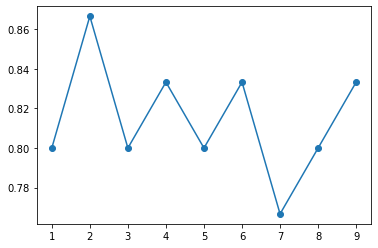

In [166]:
plt.plot(neighbors,acc_values,'-o')

In [167]:
mod_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski')
mod_knn.fit(x_train,y_train)
knn_pred = mod_knn.predict(x_test)
knn_pred

array([2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 1, 0, 1, 2, 2, 0, 2])

In [168]:
accuracy_score(y_test,knn_pred)

0.8666666666666667

### Support Vector Mechine

In [178]:
svm = SVC(kernel = 'linear')
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)
svm_pred

array([2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0, 1,
       0, 1, 0, 1, 2, 2, 0, 2])

In [179]:
accuracy_score(y_test,svm_pred)

0.8333333333333334

### Decision Tree Classifier

In [180]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_pred

array([2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2,
       0, 1, 0, 2, 1, 2, 0, 2])

In [181]:
accuracy_score(y_test,dt_pred)

0.7666666666666667

### Random Forest Classifier

In [173]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_pred

array([2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 1,
       0, 1, 0, 2, 2, 2, 0, 2])

In [174]:
accuracy_score(y_test,rf_pred)

0.8333333333333334

#### Logisti Regression and KNN got high accuracy as 86%